In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banknote-authentication/data_banknote_authentication.csv


Text(0, 0.5, 'Error')

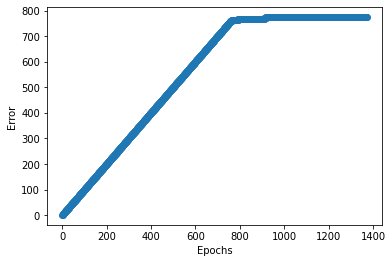

In [2]:
#------------- SLNN --------------------


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


bank=pd.read_csv("../input/banknote-authentication/data_banknote_authentication.csv")
#X=bank.drop('Class',axis=1)
#y=bank['Class']
X=bank.iloc[:,:-1].values # allocate the input at x
y=bank.iloc[:,-1].values# allocate the output column at y
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.model_selection import learning_curve


#Perceptron Class
class Perceptron(object):
    #passing to this function the learning rate and the epoch
    def __init__(self, learing_rate, epochs):
        self.learing_rate = learing_rate
        self.epochs = epochs
#traing_data_set ''where i initialize weights in a 2D array "
    def train(self, X, y):

            self.w_ = np.zeros(1 + X.shape[1]) #2D array
            self.errors_ = [] #array allocates error summation

            for i in range(self.epochs):
                errors = 0 #sum error =errors
                #this loop iterates at the two variables X,Y at the same time
                for xi, expected in zip(X, y):
                    # for each individual X and y data pair, update the error
                  #  update = self.learing_rate * (expected - self.Binary_Sign(xi))
                    delta = self.learing_rate*(expected - self.Binary_Sign(xi))
                    #update weights
                    self.w_[1:] += delta * xi
                    # weight[i+1]=weight[i+1]+learing*target-activation
                    self.w_[0] += delta
                    #stoping
                    errors +=(delta != 0.0)
                    #append errors in its list
                    self.errors_.append(errors)
               # print('>epoch=%d, lrate=%.3f, error=%.3f' % (self.epochs, self.eta, self.errors_))
                return self
    #forward propagartion
    def net_input(self, X):
        #dot get the product of 2 arrays weights and input =X
        # W= (input*weights) .....bias is taking as the first element in the array in each iteration
            return np.dot(X, self.w_[1:]) + self.w_[0]

    #binary sign funtion
    def Binary_Sign(self, X):
         return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(epochs=50, learing_rate=0.1)
ppn.train(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')

#bank.plot(x='Class')
#plt.ylabel("error")








[[190  11]
 [118  24]]


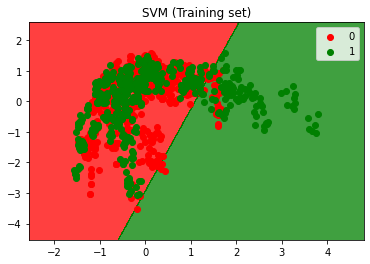

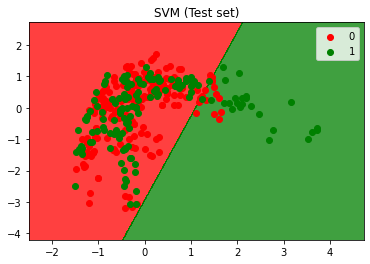

In [3]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../input/banknote-authentication/data_banknote_authentication.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')

plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')

plt.legend()
plt.show()